In [216]:
import numpy as np
import pandas as pd
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('data/clean_data.csv')

In [217]:
target = 'accuracy_all_%'

signal = df[target].values

# model = rpt.Pelt(model="rbf", min_size=5).fit(signal)
# changes = model.predict(pen=0.2)

model = rpt.Binseg(model="rbf", min_size=5).fit(signal)
changes = model.predict(n_bkps=40)

# model = rpt.KernelCPD(kernel="rbf", min_size=5).fit(signal)
# changes = model.predict(n_bkps=60)

changes = [cp for cp in changes if cp < len(df)]

In [218]:
indexes = [0] + changes + [len(signal)-1]

p-value > 0.05 → не отвергаем H₀ (нормальность).

p-value ≤ 0.05 → отвергаем H₀ (ненормальность).

In [219]:
for i in range(len(indexes) - 1):
    data = signal[indexes[i]:indexes[i+1]]
    shapiro_test = stats.shapiro(data)

    print(f"[{indexes[i]}, {indexes[i+1]}] - {shapiro_test.pvalue > 0.05}, W = {shapiro_test.statistic:.3f}")


[0, 10] - True, W = 0.888
[10, 25] - True, W = 0.937
[25, 30] - True, W = 0.924
[30, 35] - True, W = 0.852
[35, 40] - True, W = 0.957
[40, 45] - True, W = 0.929
[45, 55] - True, W = 0.956
[55, 65] - True, W = 0.940
[65, 75] - True, W = 0.845
[75, 85] - True, W = 0.927
[85, 90] - True, W = 0.997
[90, 95] - True, W = 0.812
[95, 105] - True, W = 0.960
[105, 110] - True, W = 0.903
[110, 140] - True, W = 0.940
[140, 145] - True, W = 0.900
[145, 150] - True, W = 0.897
[150, 160] - True, W = 0.940
[160, 165] - True, W = 0.961
[165, 175] - True, W = 0.959
[175, 180] - True, W = 0.813
[180, 190] - True, W = 0.888
[190, 195] - True, W = 0.915
[195, 200] - True, W = 0.866
[200, 210] - True, W = 0.934
[210, 220] - True, W = 0.953
[220, 225] - True, W = 0.982
[225, 230] - True, W = 0.807
[230, 235] - False, W = 0.620
[235, 240] - True, W = 0.903
[240, 245] - True, W = 0.925
[245, 250] - True, W = 0.786
[250, 255] - True, W = 0.963
[255, 260] - True, W = 0.962
[260, 265] - True, W = 0.959
[265, 270]

W - уверенность в результате [0,1]

In [220]:
shapiro_test = stats.shapiro(signal)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

Shapiro-Wilk test: W=0.893, p-value=0.000


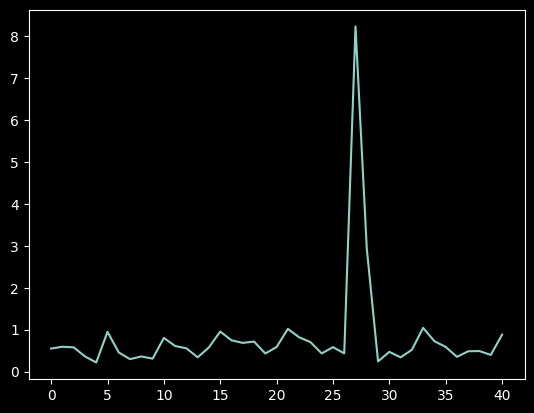

In [221]:
# stds = []
# for i in range(len(indexes) - 1):
#     data = signal[indexes[i]:indexes[i+1]]

#     stds += []

#     #print(f"{data.std():.3f}")

stds = [signal[indexes[i]:indexes[i+1]].std() for i in range(len(indexes) - 1)]

plt.plot(stds)

Тест Уэлча для проверки значимости в различии средних соседних выборок (при различной дисперсии)

Тест Бартлетт для проверки значимости в различии дисперсий соседних выборок

In [222]:
significant_diff = []

for i in range(len(indexes) - 2):
    data1 = signal[indexes[i]:indexes[i+1]]
    data2 = signal[indexes[i+1]:indexes[i+2]]

    if (stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05) \
        and (stats.levene(data1, data2).pvalue > 0.05):

        significant_diff.append(indexes[i+1])


    # print(f"{indexes[i+1]} \
    #        - mean: {stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05} \
    #        - std: {stats.bartlett(data1, data2).pvalue > 0.05} \
    #        ")

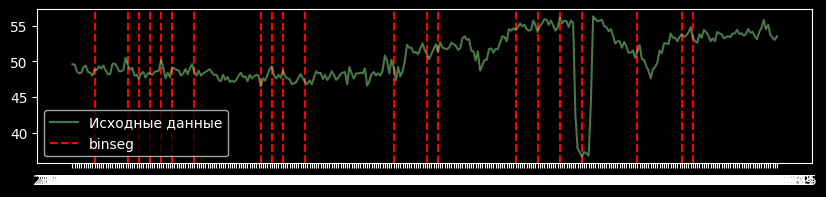

In [223]:
plt.figure(figsize=(10, 2))
plt.plot(df['date'], df[target], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

# for window_size in [14]:
#     df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
#     plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
#             label=f'Скользящее среднее (окно {window_size})', zorder=3)

significant_diff = [cp for cp in significant_diff if cp < len(df)]

for cp in significant_diff:
    plt.axvline(df['date'].iloc[cp], color="red", 
                linestyle='--', zorder=1, 
                label="binseg" if cp == significant_diff[0] else "")

plt.legend(loc='lower left')

источник 1

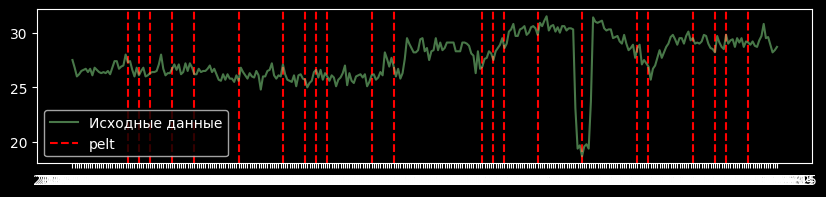

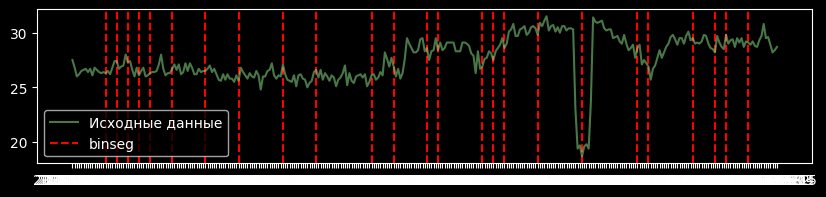

источник 2

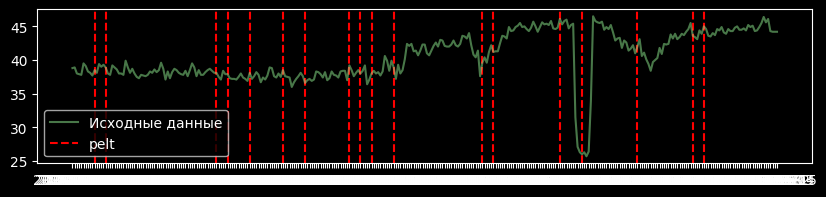

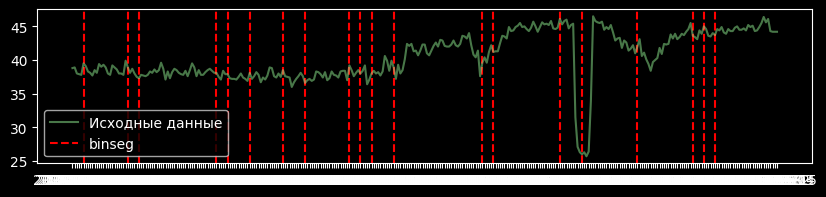